In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from statistics import mean, median
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [81]:
# Reading dataset and displaying first five rows of data
marketing=pd.read_csv('Marketing_train.csv')
marketing.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
3,55.0,management,divorced,NaN,unknown,yes,yes,cellular,jul,wed,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no
4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,...,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no


In [82]:
# checking shape od dataset
marketing.shape

(7414, 22)

In [83]:
# checking for the unique values present in categorical features.
for i in marketing.columns:
    if marketing[i].dtype==type(object):
        print(i,end=':')
        print('\n',marketing[i].unique())
        print()

profession:
 ['admin.' 'blue-collar' 'technician' 'management' 'services' 'unemployed'
 'housemaid' 'unknown' 'self-employed' 'retired' 'student' 'entrepreneur']

marital:
 ['single' 'married' 'divorced' 'unknown']

schooling:
 ['university.degree' nan 'high.school' 'basic.4y' 'basic.9y'
 'professional.course' 'basic.6y' 'unknown' 'illiterate']

default:
 ['unknown' 'no' 'yes']

housing:
 ['no' 'yes' 'unknown']

loan:
 ['no' 'yes' 'unknown']

contact:
 ['cellular' 'telephone']

month:
 ['nov' 'jul' 'may' 'aug' 'apr' 'jun' 'mar' 'oct' 'sep' 'dec']

day_of_week:
 ['mon' 'wed' 'tue' 'fri' 'thu' nan]

poutcome:
 ['nonexistent' 'failure' 'success']

responded:
 ['no' 'yes']



- Reading the data again and Replacing unknown by nan.

In [84]:
# Re-reading the data
marketing=pd.read_csv('Marketing_train.csv',na_values='unknown')

# Display head
marketing.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,admin.,single,university.degree,NaN,no,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
3,55.0,management,divorced,NaN,NaN,yes,yes,cellular,jul,wed,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no
4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,...,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no


In [85]:
# checking for the unique values present in categorical features.
for i in marketing.columns:
    if marketing[i].dtype==type(object):
        print(i,end=':')
        print('\n',marketing[i].unique())
        print()

profession:
 ['admin.' 'blue-collar' 'technician' 'management' 'services' 'unemployed'
 'housemaid' nan 'self-employed' 'retired' 'student' 'entrepreneur']

marital:
 ['single' 'married' 'divorced' nan]

schooling:
 ['university.degree' nan 'high.school' 'basic.4y' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']

default:
 [nan 'no' 'yes']

housing:
 ['no' 'yes' nan]

loan:
 ['no' 'yes' nan]

contact:
 ['cellular' 'telephone']

month:
 ['nov' 'jul' 'may' 'aug' 'apr' 'jun' 'mar' 'oct' 'sep' 'dec']

day_of_week:
 ['mon' 'wed' 'tue' 'fri' 'thu' nan]

poutcome:
 ['nonexistent' 'failure' 'success']

responded:
 ['no' 'yes']



## Exploratory data analysis

In [86]:
marketing.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail',
       'responded'],
      dtype='object')

In [87]:
marketing.describe()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
count,5610.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000
mean,40.009804,2.518344,960.024548,0.184111,0.052091,93.570708,-40.561316,3.583141,5165.224251,959.797028,0.361883
std,10.574616,2.695055,192.845029,0.516775,1.568399,0.578345,4.649800,1.744865,73.108669,193.969418,1.261668
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,999.000000,0.000000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,999.000000,0.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,999.000000,0.000000
max,94.000000,40.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,999.000000,18.000000


## Missing values analysis

In [88]:
# checking null value
marketing.isnull().sum()

custAge           1804
profession          61
marital              8
schooling         2386
default           1432
housing            168
loan               168
contact              0
month                0
day_of_week        711
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
pmonths              0
pastEmail            0
responded            0
dtype: int64

In [89]:
marketing.marital.value_counts()

married     4445
single      2118
divorced     843
Name: marital, dtype: int64

In [90]:
marketing.day_of_week.value_counts()

mon    1441
thu    1379
tue    1341
wed    1295
fri    1247
Name: day_of_week, dtype: int64

In [91]:
marketing.profession.value_counts()

admin.           1885
blue-collar      1665
technician       1212
services          719
management        536
retired           307
entrepreneur      275
self-employed     248
housemaid         187
unemployed        173
student           146
Name: profession, dtype: int64

In [92]:
marketing.schooling.value_counts()

university.degree      1554
high.school            1216
basic.9y                784
professional.course     664
basic.4y                534
basic.6y                275
illiterate                1
Name: schooling, dtype: int64

In [93]:
# Mean Imputation Missing Values for Numeric Variables
marketing["custAge"] = marketing["custAge"].fillna(marketing["custAge"].mean())

# Mode Imputation of Missing Values for Categorical Variables
marketing["schooling"] = marketing["schooling"].fillna(marketing["schooling"].mode()[0])
marketing["day_of_week"] = marketing["day_of_week"].fillna(marketing["day_of_week"].mode()[0])
marketing["default"] = marketing["default"].fillna(marketing["default"].mode()[0])
marketing["loan"] = marketing["loan"].fillna(marketing["loan"].mode()[0])
marketing["profession"] = marketing["profession"].fillna(marketing["profession"].mode()[0])
marketing["housing"] = marketing["housing"].fillna(marketing["housing"].mode()[0])
marketing["marital"] = marketing["marital"].fillna(marketing["marital"].mode()[0])

# Checking the count of missing values
marketing.isnull().sum()

custAge           0
profession        0
marital           0
schooling         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
pmonths           0
pastEmail         0
responded         0
dtype: int64

In [94]:
# checking for the unique values present in categorical features.
for i in marketing.columns:
    if marketing[i].dtype==type(object):
        print(i,end=':')
        print('\n',marketing[i].unique())
        print()

profession:
 ['admin.' 'blue-collar' 'technician' 'management' 'services' 'unemployed'
 'housemaid' 'self-employed' 'retired' 'student' 'entrepreneur']

marital:
 ['single' 'married' 'divorced']

schooling:
 ['university.degree' 'high.school' 'basic.4y' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']

default:
 ['no' 'yes']

housing:
 ['no' 'yes']

loan:
 ['no' 'yes']

contact:
 ['cellular' 'telephone']

month:
 ['nov' 'jul' 'may' 'aug' 'apr' 'jun' 'mar' 'oct' 'sep' 'dec']

day_of_week:
 ['mon' 'wed' 'tue' 'fri' 'thu']

poutcome:
 ['nonexistent' 'failure' 'success']

responded:
 ['no' 'yes']



## Univariate Analysis of Target Variable

In [95]:
# Univariate Analyisi
marketing['responded'].value_counts()

no     6574
yes     840
Name: responded, dtype: int64

In [96]:
# Checking the distribution of target variable in percentage
marketing['responded'].value_counts(normalize=True)

no     0.886701
yes    0.113299
Name: responded, dtype: float64

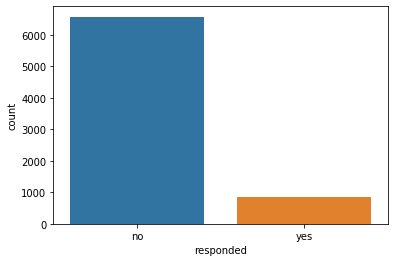

In [97]:
# Countplot to check distribution of target variable
sns.countplot(marketing['responded'])

## Outlier Analysis

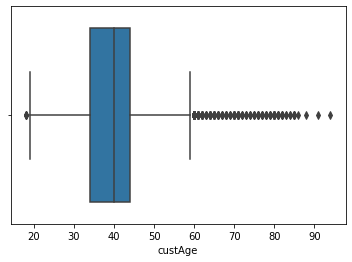

In [98]:
# Checking outlier for customer age
sns.boxplot(marketing['custAge'])

In [99]:
# count the outlier in Age column
marketing[marketing['custAge']>60]['custAge'].count()

141

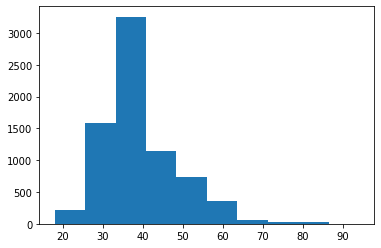

In [100]:
# plotting a histogram for the variable custAge
ax=plt.hist(marketing['custAge'],bins=10)

## Bivariate Analysis

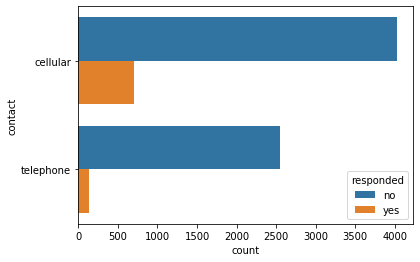

In [101]:
# Checking how many responded when the contact was celluar
sns.countplot(y=marketing['contact'],hue=marketing['responded'])

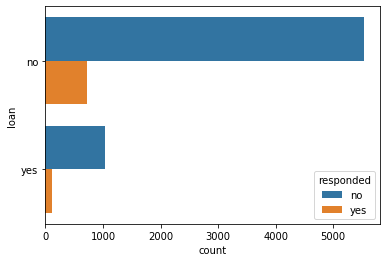

In [102]:
# Checking how many responded when the have a loan
sns.countplot(y=marketing['loan'],hue=marketing['responded'])

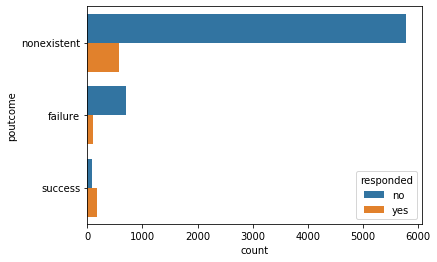

In [103]:
# Checking how many responded when the have a loan
sns.countplot(y=marketing['poutcome'],hue=marketing['responded'])

## Encding the Categorical Variables

In [104]:
# Clolumn to perform lable encoding

cols_to_le=['profession','marital','schooling','contact','month','day_of_week','poutcome','responded']

# Label Encoding the categorical variable
le=LabelEncoder()
for column in cols_to_le:
    marketing[column]=le.fit_transform(marketing[column])
marketing.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.000000,0,2,6,no,no,no,0,7,1,...,0,1,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,0
1,40.009804,1,1,6,no,no,no,0,3,1,...,0,1,1.4,93.918,-42.7,4.960,5228.1,999.0,0,0
2,42.000000,9,1,3,no,no,no,1,6,1,...,0,1,1.1,93.994,-36.4,4.857,5191.0,999.0,0,0
3,55.000000,4,0,6,no,yes,yes,0,3,4,...,0,1,1.4,93.918,-42.7,4.962,5228.1,999.0,0,0
4,40.009804,0,0,6,no,yes,no,0,6,3,...,1,0,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,0


In [105]:
#! pip install category_encoders

In [106]:
# Define the columns to perform onehot encoding
cols_to_ohe=['default','housing','loan']

# perform one hot encoding on following columns

import category_encoders as ce
ce_ohe=ce.OneHotEncoder(cols=cols_to_ohe)
marketing=ce_ohe.fit_transform(marketing)

marketing.head()

,custAge,profession,marital,schooling,default_1,default_2,housing_1,housing_2,loan_1,loan_2,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.000000,0,2,6,1,0,1,0,1,0,...,0,1,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,0
1,40.009804,1,1,6,1,0,1,0,1,0,...,0,1,1.4,93.918,-42.7,4.960,5228.1,999.0,0,0
2,42.000000,9,1,3,1,0,1,0,1,0,...,0,1,1.1,93.994,-36.4,4.857,5191.0,999.0,0,0
3,55.000000,4,0,6,1,0,0,1,0,1,...,0,1,1.4,93.918,-42.7,4.962,5228.1,999.0,0,0
4,40.009804,0,0,6,1,0,0,1,1,0,...,1,0,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,0


In [107]:
# pday has values 999 when not contacted before
# It is a too high value and impact the analysis, so change it.

marketing['pdays'].replace(999,-1,inplace=True)
marketing['pmonths'].replace(999,-1,inplace=True)

marketing.head(5)

,custAge,profession,marital,schooling,default_1,default_2,housing_1,housing_2,loan_1,loan_2,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.000000,0,2,6,1,0,1,0,1,0,...,0,1,-0.1,93.200,-42.0,4.191,5195.8,-1.0,0,0
1,40.009804,1,1,6,1,0,1,0,1,0,...,0,1,1.4,93.918,-42.7,4.960,5228.1,-1.0,0,0
2,42.000000,9,1,3,1,0,1,0,1,0,...,0,1,1.1,93.994,-36.4,4.857,5191.0,-1.0,0,0
3,55.000000,4,0,6,1,0,0,1,0,1,...,0,1,1.4,93.918,-42.7,4.962,5228.1,-1.0,0,0
4,40.009804,0,0,6,1,0,0,1,1,0,...,1,0,-1.8,92.893,-46.2,1.291,5099.1,-1.0,1,0


In [108]:
# Splitting the data into X and y
X=marketing.drop('responded',axis=1)
y=marketing['responded']

## Standardization on the data

In [109]:
# Save numeric columns in a variables
cnames=['custAge','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','pmonths','pastEmail']

sc=StandardScaler()
for col in cnames:
    X[col]=sc.fit_transform(X[col].values.reshape(-1,1))
    
X.head(5)

,custAge,profession,marital,schooling,default_1,default_2,housing_1,housing_2,loan_1,loan_2,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
0,1.629770e+00,0,2,6,1,0,1,0,1,0,...,-0.178638,-0.356294,1,-0.096978,-0.641025,-0.309429,0.348394,0.418252,-0.201061,-0.286848
1,7.725190e-16,1,1,6,1,0,1,0,1,0,...,-0.178638,-0.356294,1,0.859475,0.600533,-0.459983,0.789146,0.860089,-0.201061,-0.286848
2,2.163789e-01,9,1,3,1,0,1,0,1,0,...,-0.178638,-0.356294,1,0.668184,0.731952,0.895006,0.730111,0.352591,-0.201061,-0.286848
3,1.629770e+00,4,0,6,1,0,0,1,0,1,...,-0.178638,-0.356294,1,0.859475,0.600533,-0.459983,0.790292,0.860089,-0.201061,-0.286848
4,7.725190e-16,0,0,6,1,0,0,1,1,0,...,-0.178638,1.578915,0,-1.180959,-1.171886,-1.212754,-1.313738,-0.904526,-0.201061,0.505806


## Model Developement

### Splitting the data into train test split

In [110]:
# Splitting the dataset into the Training set and Test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

## Fitting logistic model

In [111]:
# Fitting logistic regression to training set
from sklearn.linear_model import LogisticRegression

classifier_log=LogisticRegression()
model=classifier_log.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [112]:
# predicting on test data
y_pred_log=classifier_log.predict(X_test)

In [113]:
# checking accuracy of the model
print(accuracy_score(y_pred_log,y_test)*100)

91.43627781523938


## Fitting A Decission Tree Classifier

In [114]:
# Using DecisionTreeClassifier of tree class to use Decion tree Alforithm
from sklearn.tree import DecisionTreeClassifier

classifier_tree=DecisionTreeClassifier()
model=classifier_tree.fit(X_train,y_train)

In [115]:
# Prediction on the test data
y_pred_tree=classifier_tree.predict(X_test)

In [116]:
# Checking the accuracy of the model
print(accuracy_score(y_pred_tree,y_test)*100)

82.93998651382333


In [117]:
# Using RandomForestClassifier of tree class to use Decion tree Alforithm
from sklearn.ensemble import RandomForestClassifier

classifier_forest=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
model=classifier_forest.fit(X_train,y_train)

In [118]:
# Prediction on the test data
y_pred_forest=classifier_forest.predict(X_test)

In [119]:
# Checking the accuracy of the model
print(accuracy_score(y_pred_forest,y_test)*100)

90.22252191503709


## Roc Curve

In [120]:
prob=classifier_forest.predict_proba(X_test)
prob

array([[0.99, 0.01],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.98, 0.02],
       [0.97, 0.03],
       [1.  , 0.  ]])

In [121]:
# Keep Probs of positive class only
prob_positive=prob[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve: ',roc_auc)

Area under the curve:  0.759500097162845


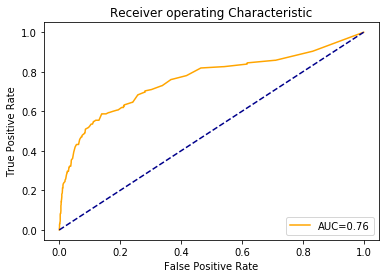

In [122]:
# plot ROC curve 
plt.title('Receiver operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## K-Fold Validation

In [123]:
X=np.array(X)

In [124]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True)

# enumerate the splits and summarize the distributions
for train_ix, test_ix in kfold.split(X, y):
    # select rows
    train_X, test_X = X[train_ix], X[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]
    
    # summarize train and test composition
    train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print('Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

Train: 0=5249, 1=682, Test: 0=1325, 1=158
Train: 0=5270, 1=661, Test: 0=1304, 1=179
Train: 0=5255, 1=676, Test: 0=1319, 1=164
Train: 0=5265, 1=666, Test: 0=1309, 1=174
Train: 0=5257, 1=675, Test: 0=1317, 1=165


K-fold validation will not distribute minority and majority class samples in a appropriate ratio.

For imbalanced class problem we need to divide the samples of minority and majority class into appropriate ratio in train set and test set. 

In [125]:
from sklearn.model_selection import StratifiedKFold

strata_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

scores=[]
auc_list=[]

# enumerate the splits and summarize the distributions
for train_ix, test_ix in strata_kfold.split(X, y):
    # select rows
    train_X, test_X = X[train_ix], X[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]
    # summarize train and test composition
    train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print('Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
    model = classifier_forest.fit(train_X, train_y)
    predictions=classifier_forest.predict(test_X)
    scores.append(model.score(test_X,test_y))
    
    # write a code to compute auc for each random sample
    probs=classifier_forest.predict_proba(test_X)
    probs
    prob_positive=probs[:,1]
    fpr,tpr,threshold=metrics.roc_curve(test_y,prob_positive)
    roc_auc=metrics.auc(fpr,tpr)
    #append auc into the list auc_list
    auc_list.append(roc_auc)

print('\n Scores from each prediction:', scores)
print('\n Average stratified k-fold score:', np.mean(scores))
print('\n AUC from each prediction:', auc_list)
print('\n Avg AUC from each prediction:', np.mean(auc_list))

Train: 0=5259, 1=672, Test: 0=1315, 1=168
Train: 0=5259, 1=672, Test: 0=1315, 1=168
Train: 0=5259, 1=672, Test: 0=1315, 1=168
Train: 0=5259, 1=672, Test: 0=1315, 1=168
Train: 0=5260, 1=672, Test: 0=1314, 1=168

 Scores from each prediction: [0.8941335131490222, 0.8907619689817937, 0.8867161159811193, 0.904248145650708, 0.8960863697705803]

 Average stratified k-fold score: 0.8943892227066446

 AUC from each prediction: [0.7538633894622488, 0.7272700525076952, 0.7910804816223067, 0.799619771863118, 0.7837550735667174]

 Avg AUC from each prediction: 0.7711177538044172


## Upsampling-Oversampling

In [126]:
print(marketing['responded'].value_counts())
df_majority=marketing[marketing['responded']==0]
df_minority=marketing[marketing['responded']==1]

0    6574
1     840
Name: responded, dtype: int64


In [127]:
df_minority.shape

(840, 25)

In [128]:
import sklearn.utils as ut
# Upsample minority class
df_minority_upsampled=ut.resample(df_minority,
                                 replace=True,    # Sample with replacement     
                                 n_samples=6574,   # to match majority class
                                 random_state=1)  #reproducible result

In [129]:
# combine majority class with upsampled majority class
df_upsampled=pd.concat([df_majority,df_minority_upsampled])

In [130]:
df_upsampled.shape

(13148, 25)

In [131]:
# Display new class counts
print(df_upsampled.responded.value_counts())
df_upsampled.head()

1    6574
0    6574
Name: responded, dtype: int64


,custAge,profession,marital,schooling,default_1,default_2,housing_1,housing_2,loan_1,loan_2,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.000000,0,2,6,1,0,1,0,1,0,...,0,1,-0.1,93.200,-42.0,4.191,5195.8,-1.0,0,0
1,40.009804,1,1,6,1,0,1,0,1,0,...,0,1,1.4,93.918,-42.7,4.960,5228.1,-1.0,0,0
2,42.000000,9,1,3,1,0,1,0,1,0,...,0,1,1.1,93.994,-36.4,4.857,5191.0,-1.0,0,0
3,55.000000,4,0,6,1,0,0,1,0,1,...,0,1,1.4,93.918,-42.7,4.962,5228.1,-1.0,0,0
4,40.009804,0,0,6,1,0,0,1,1,0,...,1,0,-1.8,92.893,-46.2,1.291,5099.1,-1.0,1,0


In [132]:
X_upsampled=df_upsampled.drop('responded',axis=1)
Y_upsampled=df_upsampled['responded']

In [133]:
# Save numeric columns in a variables
cnames=['custAge','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','pmonths','pastEmail']

sc=StandardScaler()
for col in cnames:
    X_upsampled[col]=sc.fit_transform(X_upsampled[col].values.reshape(-1,1))
    
X_upsampled.head(5)

,custAge,profession,marital,schooling,default_1,default_2,housing_1,housing_2,loan_1,loan_2,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
0,1.377180,0,2,6,1,0,1,0,1,0,...,-0.325314,-0.453227,1,0.263351,-0.431335,-0.297790,0.690567,0.731752,-0.367893,-0.356188
1,-0.037966,1,1,6,1,0,1,0,1,0,...,-0.325314,-0.453227,1,1.141928,0.705235,-0.426537,1.098455,1.103462,-0.367893,-0.356188
2,0.149918,9,1,3,1,0,1,0,1,0,...,-0.325314,-0.453227,1,0.966213,0.825541,0.732185,1.043823,0.676513,-0.367893,-0.356188
3,1.377180,4,0,6,1,0,0,1,0,1,...,-0.325314,-0.453227,1,1.141928,0.705235,-0.426537,1.099516,1.103462,-0.367893,-0.356188
4,-0.037966,0,0,6,1,0,0,1,1,0,...,-0.325314,0.946264,0,-0.732371,-0.917306,-1.070271,-0.847633,-0.381078,-0.367893,0.213331


In [134]:
# Splitting the dataset into the Training set and Test set
X_train,X_test,y_train,y_test=train_test_split(X_upsampled,Y_upsampled,test_size=0.20,random_state=0)

## Logistic Regression

In [135]:
# Fitting logistic regression to training set
from sklearn.linear_model import LogisticRegression

classifier_log=LogisticRegression()
model=classifier_log.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [136]:
# predicting on test data
y_pred_log=classifier_log.predict(X_test)

In [137]:
# checking accuracy of the model
print(accuracy_score(y_pred_log,y_test)*100)

73.80228136882128


In [138]:
# Area under curve
probs=classifier_log.predict_proba(X_test)
prob_positive=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.798923637154948

## Decision Tree with upsampled data

In [139]:
# Using DecisionTreeClassifier of tree class to use Decion tree Alforithm
from sklearn.tree import DecisionTreeClassifier

classifier_tree=DecisionTreeClassifier()
model=classifier_tree.fit(X_train,y_train)

In [140]:
# Prediction on the test data
y_pred_tree=classifier_tree.predict(X_test)

In [141]:
# Checking the accuracy of the model
print(accuracy_score(y_pred_tree,y_test)*100)

94.44866920152091


In [142]:
# Area under curve
probs=classifier_tree.predict_proba(X_test)
prob_positive=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.942892810511987

## DownSampling-Undersampling

In [143]:
print(marketing['responded'].value_counts())
df_majority=marketing[marketing['responded']==0]
df_minority=marketing[marketing['responded']==1]

0    6574
1     840
Name: responded, dtype: int64


In [144]:
import sklearn.utils as ut
# Upsample minority class
df_majority_upsampled=ut.resample(df_majority,
                                 replace=True,    # Sample with replacement     
                                 n_samples=840,   # to match majority class
                                 random_state=1)  #reproducible result

In [145]:
# combine majority class with upsampled majority class
df_downsampled=pd.concat([df_minority,df_majority_upsampled])

In [146]:
df_downsampled.shape

(1680, 25)

In [147]:
# Display new class counts
print(df_downsampled.responded.value_counts())
df_downsampled.head()

1    840
0    840
Name: responded, dtype: int64


,custAge,profession,marital,schooling,default_1,default_2,housing_1,housing_2,loan_1,loan_2,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
6,35.0,7,2,6,1,0,0,1,1,0,...,0,1,1.1,93.994,-36.4,4.856,5191.0,-1.0,0,1
16,32.0,0,2,5,1,0,1,0,1,0,...,0,1,1.4,93.918,-42.7,4.963,5228.1,-1.0,0,1
21,32.0,0,1,6,1,0,1,0,1,0,...,1,2,-1.8,92.893,-46.2,1.327,5099.1,0.2,1,1
37,22.0,8,2,3,1,0,0,1,0,1,...,0,1,-1.8,92.893,-46.2,1.354,5099.1,-1.0,0,1
47,31.0,1,1,6,1,0,0,1,1,0,...,0,1,1.4,93.918,-42.7,4.962,5228.1,-1.0,0,1


In [148]:
X_downsampled=df_downsampled.drop('responded',axis=1)
Y_downsampled=df_downsampled['responded']

In [149]:
# Save numeric columns in a variables
cnames=['custAge','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','pmonths','pastEmail']

sc=StandardScaler()
for col in cnames:
    X_downsampled[col]=sc.fit_transform(X_downsampled[col].values.reshape(-1,1))
print(X_downsampled.shape)    
X_downsampled.head(5)

(1680, 24)


,custAge,profession,marital,schooling,default_1,default_2,housing_1,housing_2,loan_1,loan_2,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
6,-0.506142,7,2,6,1,0,0,1,1,0,...,-0.322269,-0.457708,1,0.977344,0.830373,0.729084,1.048023,0.679898,-0.364489,-0.356552
16,-0.790050,0,2,5,1,0,1,0,1,0,...,-0.322269,-0.457708,1,1.153840,0.710057,-0.433829,1.104930,1.108006,-0.364489,-0.356552
21,-0.790050,0,1,6,1,0,1,0,1,0,...,2.352314,0.945484,2,-0.728779,-0.912629,-1.079892,-0.828847,-0.380564,2.702327,0.217760
37,-1.736413,8,2,3,1,0,0,1,0,1,...,-0.322269,-0.457708,1,-0.728779,-0.912629,-1.079892,-0.814488,-0.380564,-0.364489,-0.356552
47,-0.884687,1,1,6,1,0,0,1,1,0,...,-0.322269,-0.457708,1,1.153840,0.710057,-0.433829,1.104398,1.108006,-0.364489,-0.356552


In [150]:
# Splitting the dataset into the Training set and Test set
X_train,X_test,y_train,y_test=train_test_split(X_downsampled,Y_downsampled,test_size=0.20,random_state=0)

## Logistic Regression in DownSampled Data

In [151]:
# Fitting logistic regression to training set
from sklearn.linear_model import LogisticRegression

classifier_log=LogisticRegression()
model=classifier_log.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [152]:
# predicting on test data
y_pred_log=classifier_log.predict(X_test)

In [153]:
# checking accuracy of the model
print(accuracy_score(y_pred_log,y_test)*100)

76.78571428571429


In [154]:
# Area under curve
probs=classifier_log.predict_proba(X_test)
prob_positive=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.8106154554795734

## Decision Tree in DownSampled Data

In [155]:
# Using DecisionTreeClassifier of tree class to use Decion tree Alforithm
from sklearn.tree import DecisionTreeClassifier

classifier_tree=DecisionTreeClassifier()
model=classifier_tree.fit(X_train,y_train)

In [156]:
# Prediction on the test data
y_pred_tree=classifier_tree.predict(X_test)

In [157]:
# Checking the accuracy of the model
print(accuracy_score(y_pred_tree,y_test)*100)

61.904761904761905


In [158]:
# Area under curve
probs=classifier_tree.predict_proba(X_test)
prob_positive=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.6208943060624315